#EDA Credit Exploratory Data Analysis Case Study - May - 2024


Submitted By:
Dheeraj Salwadi || Email: dhiraj.salwadi2000@gmail.com || Contact: +91 7977622612
Devesh Khatri || Email: devesh.khatri44@gmail.com || Contact: +91 8383076771

Dated: 29/05/2024

In this case study, we explore risk analytics in the banking and financial services sector through the lens of a consumer finance company specializing in various types of loans to urban customers. The primary focus is on minimizing the risk of financial loss by identifying applicants likely to default on their loans. The data set provided includes information on past loan applicants and their repayment status, categorized into:

1. fully paid
2. current
3. charged-off' (defaulters)

By conducting an exploratory data analysis (EDA), we aim to uncover patterns and key indicators that can predict loan default. This understanding will enable the company to make informed decisions, such as denying loans to high-risk applicants or adjusting loan terms to mitigate potential losses. Ultimately, the goal is to enhance the company's risk assessment capabilities, thereby reducing credit losses and improving overall financial stability.

In [7]:
#Importing necessary libraries required for analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes = True)

In [8]:
#ignore the warnings
import warnings
warnings.simplefilter('ignore')

In [4]:
from google.colab import files


uploaded = files.upload()

Saving loan.csv to loan.csv


In [10]:
import io

loan_data = pd.read_csv(io.BytesIO(uploaded['loan.csv']))

In [11]:
#Total rows and columns of the Loan Data set

loan_data.shape

(39717, 111)

## Data Cleaning on the Loan Data set

This section will cater to the data cleaning exercise, we will primarily perform the following operations:

1. Understanding the data types of various columns.
2. Understanding the data variables by using the data dictionary.
3. Removing the columns which have NULL/Blank values. After careful analysis, it was observed that all columns with NULL values > 30% can be safely removed.




In [12]:
#describing each numerical column of loan data set

loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


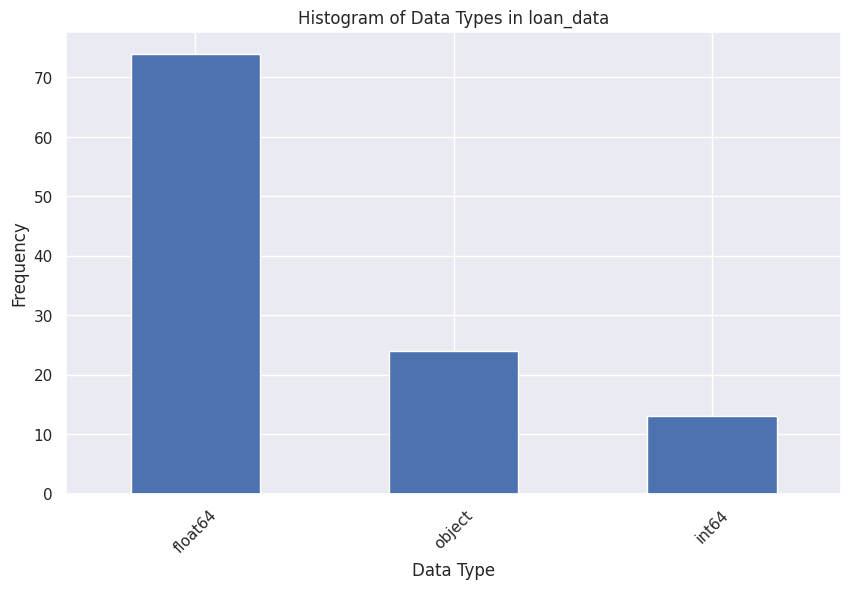

In [13]:
data_types = loan_data.dtypes

# Step 2: Count the occurrences of each data type
data_type_counts = data_types.value_counts()

# Step 3: Plot the counts using a histogram
plt.figure(figsize=(10, 6))
data_type_counts.plot(kind='bar')
plt.title('Histogram of Data Types in loan_data')
plt.xlabel('Data Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [14]:
#listing all the columns present in the Loan data set

print(loan_data.keys())

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


In [16]:
#checking the null value percentages

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

loan_data_percentage = round((100*loan_data.isnull().sum()/len(loan_data)), 2)
loan_data_percentage.sort_values(ascending=False)

verification_status_joint         100.00
annual_inc_joint                  100.00
mo_sin_old_rev_tl_op              100.00
mo_sin_old_il_acct                100.00
bc_util                           100.00
bc_open_to_buy                    100.00
avg_cur_bal                       100.00
acc_open_past_24mths              100.00
inq_last_12m                      100.00
total_cu_tl                       100.00
inq_fi                            100.00
total_rev_hi_lim                  100.00
all_util                          100.00
max_bal_bc                        100.00
open_rv_24m                       100.00
open_rv_12m                       100.00
il_util                           100.00
total_bal_il                      100.00
mths_since_rcnt_il                100.00
open_il_24m                       100.00
open_il_12m                       100.00
open_il_6m                        100.00
open_acc_6m                       100.00
tot_cur_bal                       100.00
tot_coll_amt    

In [17]:
# removing columns with null values more than 90%

loan_data = loan_data.loc[:, loan_data.isnull().mean() <= 0.9]

In [18]:
#Number of columns left after removal of the null values <= 90%
len(loan_data.columns)

55

### Previously we had 111 columns, after dropping the columns with more than 90% (56).
### We now have only 55 columns.

In [19]:
#checking the data again

round((100*loan_data.isnull().sum()/len(loan_data)),2).sort_values(ascending=False)

mths_since_last_delinq        64.66
desc                          32.59
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
chargeoff_within_12_mths       0.14
collections_12_mths_ex_med     0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
out_prncp                      0.00
initial_list_status            0.00
out_prncp_inv                  0.00
total_pymnt                    0.00
total_acc                      0.00
total_pymnt_inv                0.00
recoveries                     0.00
total_rec_prncp                0.00
total_rec_int                  0.00
total_rec_late_fee             0.00
pub_rec                        0.00
collection_recovery_fee        0.00
last_pymnt_amnt                0.00
policy_code                    0.00
application_type               0.00
acc_now_delinq              

In [20]:
# removing null values more than 30%
# There are 2 such columns:
# mths_since_last_delinq (>60%) = This data is irrelevant as per our study
# desc (30%) = This column has unstructured data hence this is not useful unless advanced text analysis methods are applied.

loan_data = loan_data.loc[:, loan_data.isnull().mean() <= 0.3]

In [21]:
#Number of columns left after removal of the null values >= 30%
len(loan_data.columns)

53

### we have removed 2 columns desc and mths_since_last_delinq  
### And now we remain with 53 columns

In [22]:
#checking the data again

round((100*loan_data.isnull().sum()/len(loan_data)),2).sort_values(ascending=False)

emp_title                     6.19
emp_length                    2.71
pub_rec_bankruptcies          1.75
last_pymnt_d                  0.18
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
revol_util                    0.13
tax_liens                     0.10
title                         0.03
last_credit_pull_d            0.01
total_rec_prncp               0.00
out_prncp                     0.00
initial_list_status           0.00
out_prncp_inv                 0.00
total_acc                     0.00
total_pymnt                   0.00
total_pymnt_inv               0.00
collection_recovery_fee       0.00
total_rec_int                 0.00
total_rec_late_fee            0.00
recoveries                    0.00
pub_rec                       0.00
last_pymnt_amnt               0.00
policy_code                   0.00
application_type              0.00
acc_now_delinq                0.00
delinq_amnt                   0.00
revol_bal                     0.00
id                  

## Imputing the missing values

While the columns which did not have significant data was removed, there are 6 columns where the data vacancy was less than 6.5%. Hence, it makes sense to understand these columns and make suitable arrangements.

The arrangements are made in 2 ways based on the data type of the column:

1. **Categorical Column**: For categorical columns, the data has been replaced by a new category called "Unknown" since external references of data is not available.

2. **Numerical Column**: For numerical columns, the data is being replaced with the median of the data.

Also, there are some columns which are deemed irrelevant for our analysis since those are either unstructured, or are unique system IDs or not relevant as per the problem.

In [23]:
# List of columns with missing values
columns_with_missing_values = loan_data.columns[loan_data.isnull().any()]
columns_with_missing_values

Index(['emp_title', 'emp_length', 'title', 'revol_util', 'last_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [24]:
# Identify categorical and numerical columns
categorical_columns = loan_data.select_dtypes(include=['object']).columns
numerical_columns = loan_data.select_dtypes(include=['float64', 'int64']).columns

In [25]:
# Separate the columns with missing values into categorical and numerical
categorical_missing = [col for col in columns_with_missing_values if col in categorical_columns]
numerical_missing = [col for col in columns_with_missing_values if col in numerical_columns]

In [26]:
# Print the columns with missing values, separated by categorical and numerical
print("Categorical columns with missing values:", categorical_missing)
print("Numerical columns with missing values:", numerical_missing)


Categorical columns with missing values: ['emp_title', 'emp_length', 'title', 'revol_util', 'last_pymnt_d', 'last_credit_pull_d']
Numerical columns with missing values: ['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens']


### Here we can see that the columns emp_length, revol_util, last_pymnt_d, last_credit_pull_d are also counted as categorical columns because they have outliers in the data

In [27]:
# Columns initially misclassified as categorical due to data issues
potentially_misclassified_columns = ['emp_length', 'revol_util', 'last_pymnt_d', 'last_credit_pull_d']

In [28]:
# Function to convert columns to the correct data type
def correct_column_types(df):

    # Convert 'emp_length' to numeric by extracting digits and handling '< 1 year' and '10+ years'
    df['emp_length'] = df['emp_length'].astype(str).str.extract('(\d+)').astype(float)
    df['emp_length'].fillna(0, inplace=True)
    # Assuming '< 1 year' as 0 years and filling NaNs with median

    # Convert 'revol_util' to numeric by removing '%' and converting to float
    df['revol_util'] = df['revol_util'].astype(str).str.replace('%', '').astype(float)

    # Convert 'last_pymnt_d' and 'last_credit_pull_d' to datetime
    df['last_pymnt_d'] = pd.to_datetime(loan_data['last_pymnt_d'], format='%d-%m-%Y', errors='coerce')
    df['last_credit_pull_d'] = pd.to_datetime(loan_data['last_credit_pull_d'], format='%d-%m-%Y', errors='coerce')


    return df



In [29]:
## Removing the percentage signs and convert to float
loan_data['int_rate'] = loan_data['int_rate'].astype(str).str.rstrip('%').astype(float)

# Verify the changes
loan_data['int_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

In [30]:
type(loan_data['last_pymnt_d'][0])

str

In [31]:
# Apply the type correction function
loan_data = correct_column_types(loan_data)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10.0,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,NaT,171.62,NaT,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,1.0,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,NaT,119.66,NaT,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10.0,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,NaT,649.91,NaT,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,NaT,357.48,NaT,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1.0,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,NaT,67.79,NaT,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [32]:
# Check the columns with missing values again
missing_values_after_correction = loan_data.isnull().sum()
columns_with_missing_values_after_correction = missing_values_after_correction[missing_values_after_correction > 0].index.tolist()


In [33]:
len(loan_data.keys())

53

In [34]:
irrelevant_columns = [
    'next_pymnt_d',
    'mths_since_last_record',
    'mths_since_last_delinq',
    'desc',
    'title',
    'initial_list_status',
    'policy_code',
    'url',
    'zip_code',
    'member_id',
    'id'
]

In [35]:
x= [cols for cols in irrelevant_columns if cols in loan_data.keys()]
loan_data.drop(columns=x, inplace=True)

In [50]:
len(loan_data.keys())

46

In [52]:
loan_data.keys()

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [37]:
## Get the number of years from using Regex
loan_data['term'] = loan_data['term'].astype(str).str.extract('(\d+)').astype(int)

##Here we observe that there are 46 columns which are to be analysed from the initial 111 columns.


# Univariate Analysis

This section will deal with the univariate analysis of the data. Primarily we will use the following approach to undertand the data:

1. **Numerical Data**: We will use histogram to understand the numerical data and summary metrics where necessary.
2. **Categorical Values**: We will use bar graphs for analysing the categorical values.

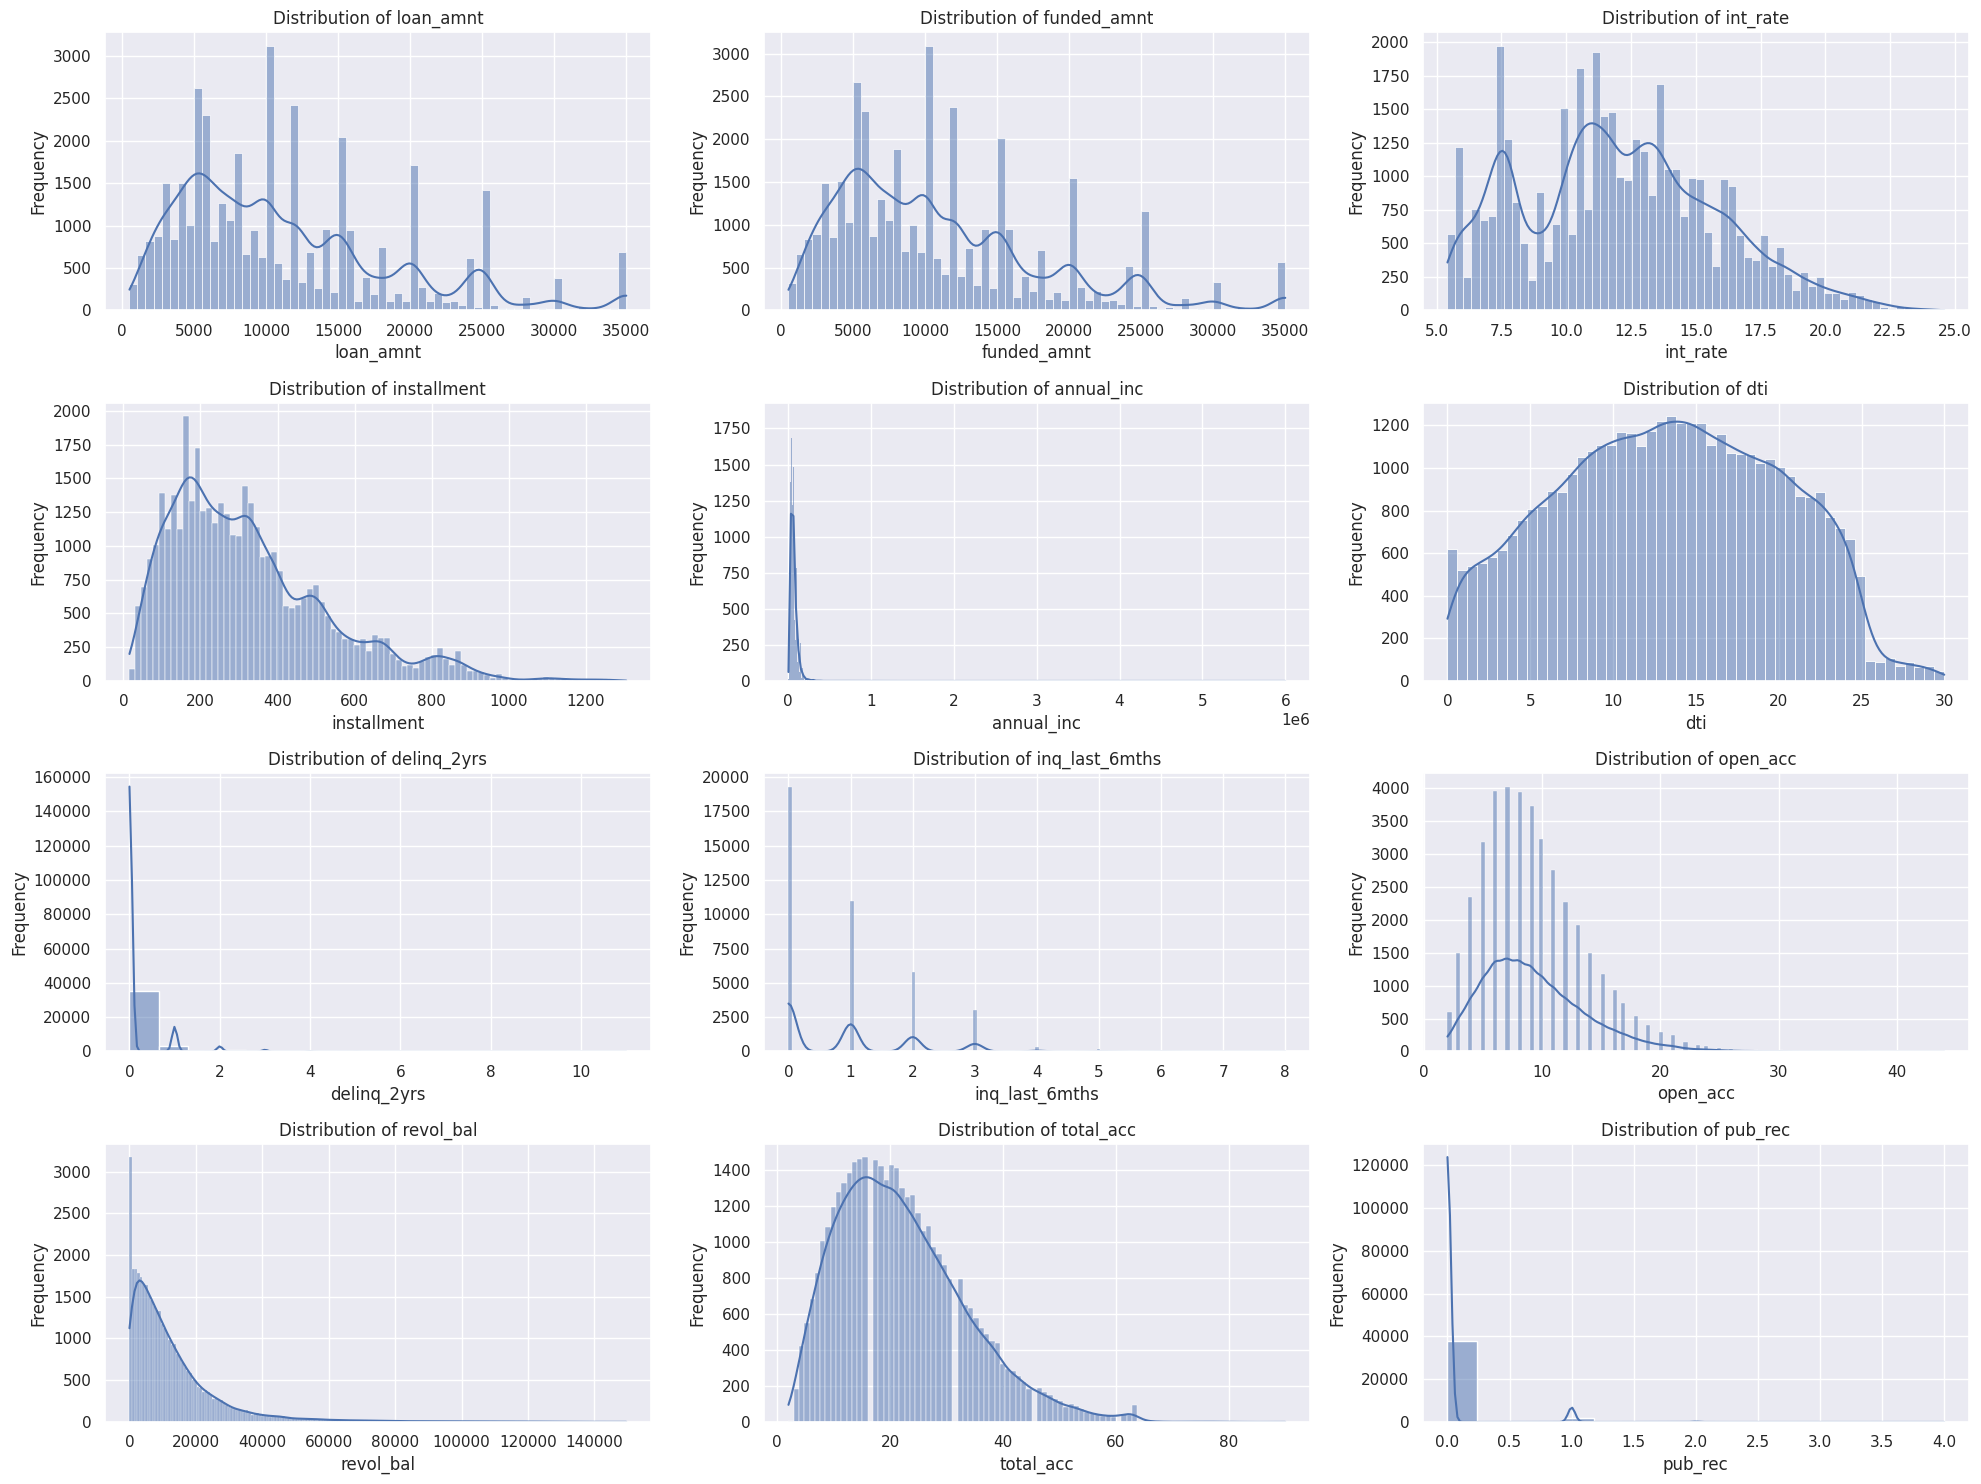

In [55]:
## Univariate Analysis for Numerical Columns

# List of numerical columns
numerical_columns = [
    'loan_amnt', 'funded_amnt', 'int_rate', 'installment',
    'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
    'open_acc', 'revol_bal', 'total_acc','pub_rec'
]

# Plotting histograms for numerical variables
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(loan_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [39]:
loan_data[numerical_columns].describe()

,loan_amnt,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,total_acc
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000
mean,11219.443815,10947.713196,12.021177,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,13382.528086,22.088828
std,7456.670694,7187.238670,3.724825,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,15885.016641,11.401709
min,500.000000,500.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000
25%,5500.000000,5400.000000,9.250000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,3703.000000,13.000000
50%,10000.000000,9600.000000,11.860000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,8850.000000,20.000000
75%,15000.000000,15000.000000,14.590000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,17058.000000,29.000000
max,35000.000000,35000.000000,24.590000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,149588.000000,90.000000


ValueError: num must be an integer with 1 <= num <= 9, not 10

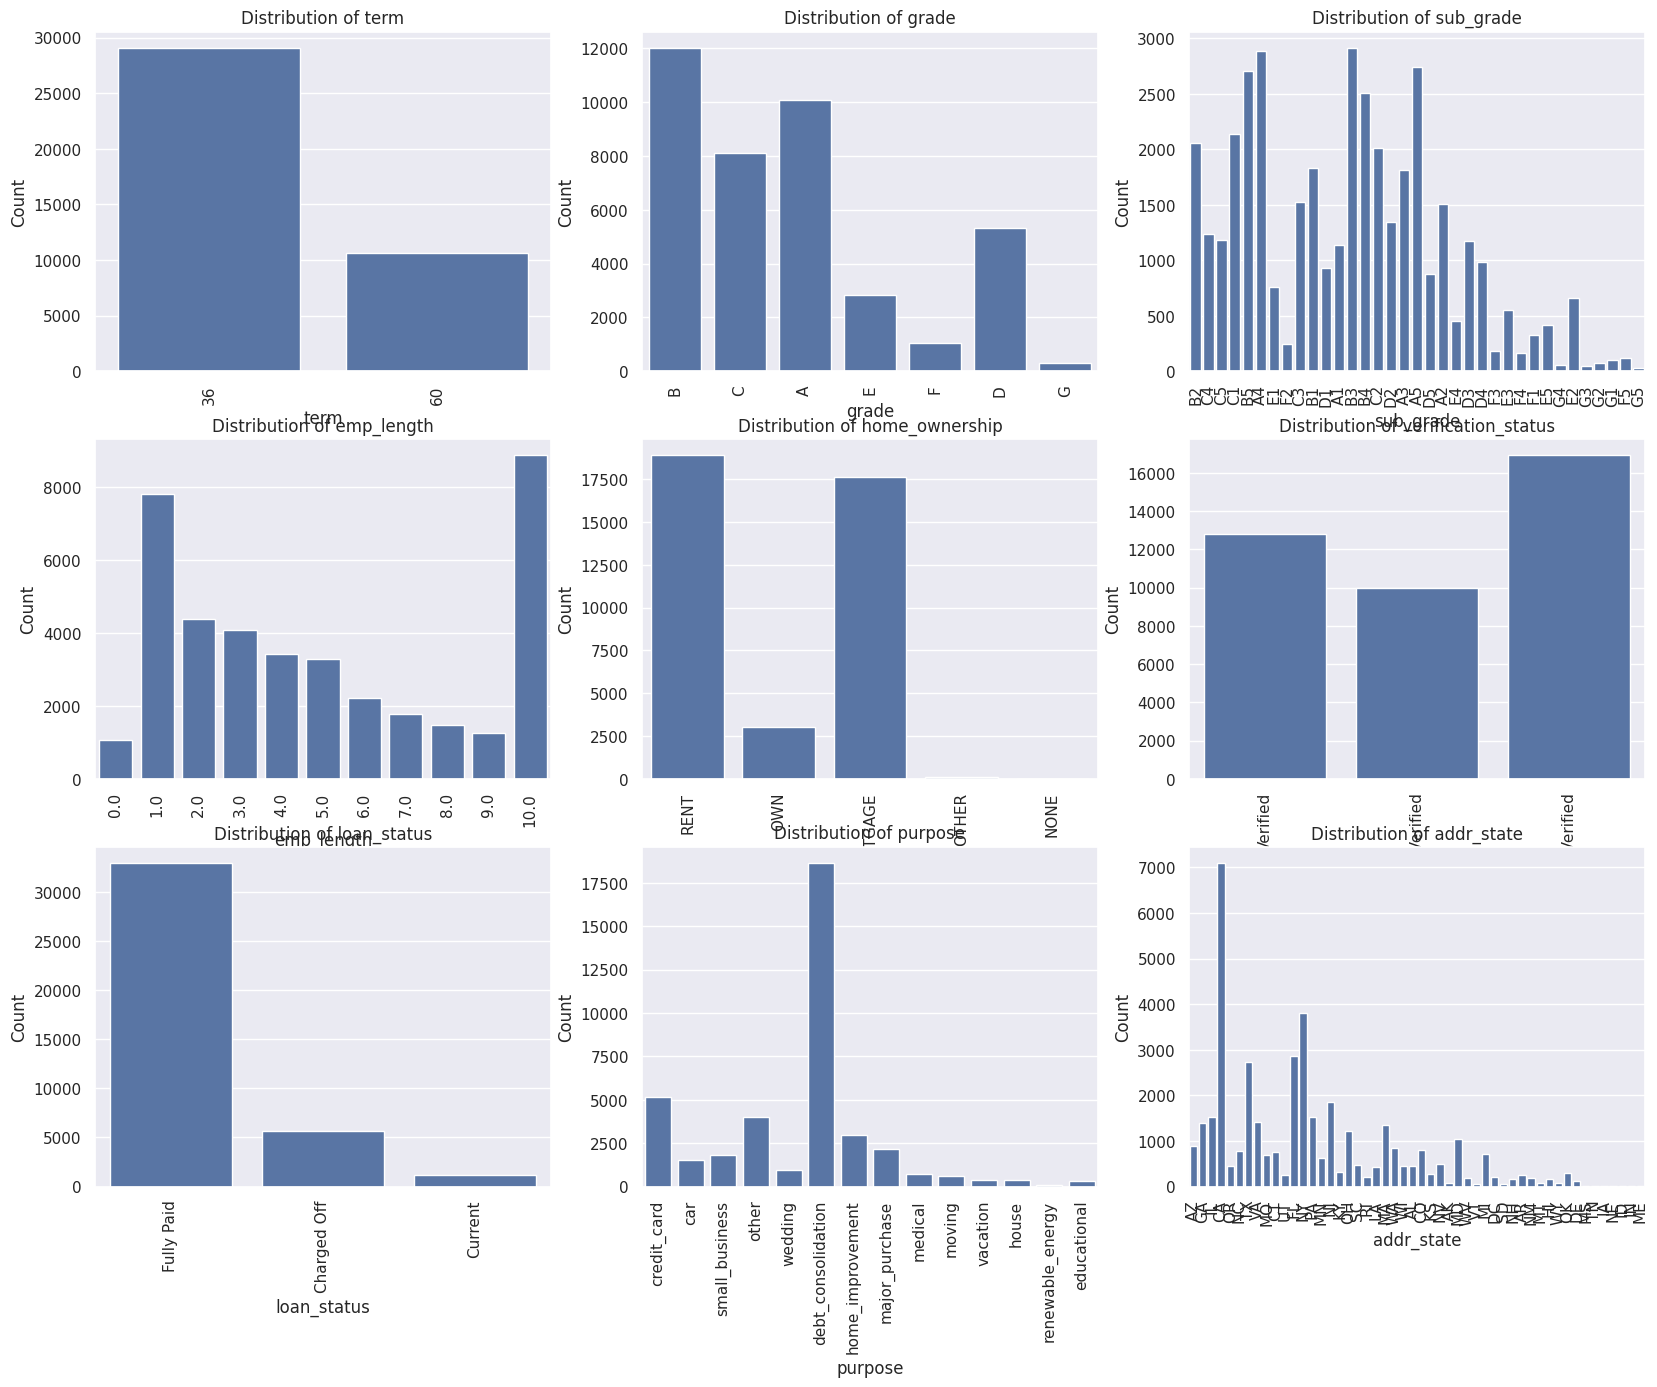

In [58]:
categorical_columns = [
    'term', 'grade', 'sub_grade', 'emp_length',
    'home_ownership', 'verification_status', 'loan_status',
    'purpose', 'addr_state','application_type']

# Plotting count plots for categorical variables
plt.figure(figsize=(20, 15))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=loan_data[column])
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Segmented Univariate and Bivariate Analysis

This section deals with the the segmented univariate and Bivariate Analysis. Also, this analysis would allow us to understand the impact of our variables on the loan status and would help us which variables impact the loan.

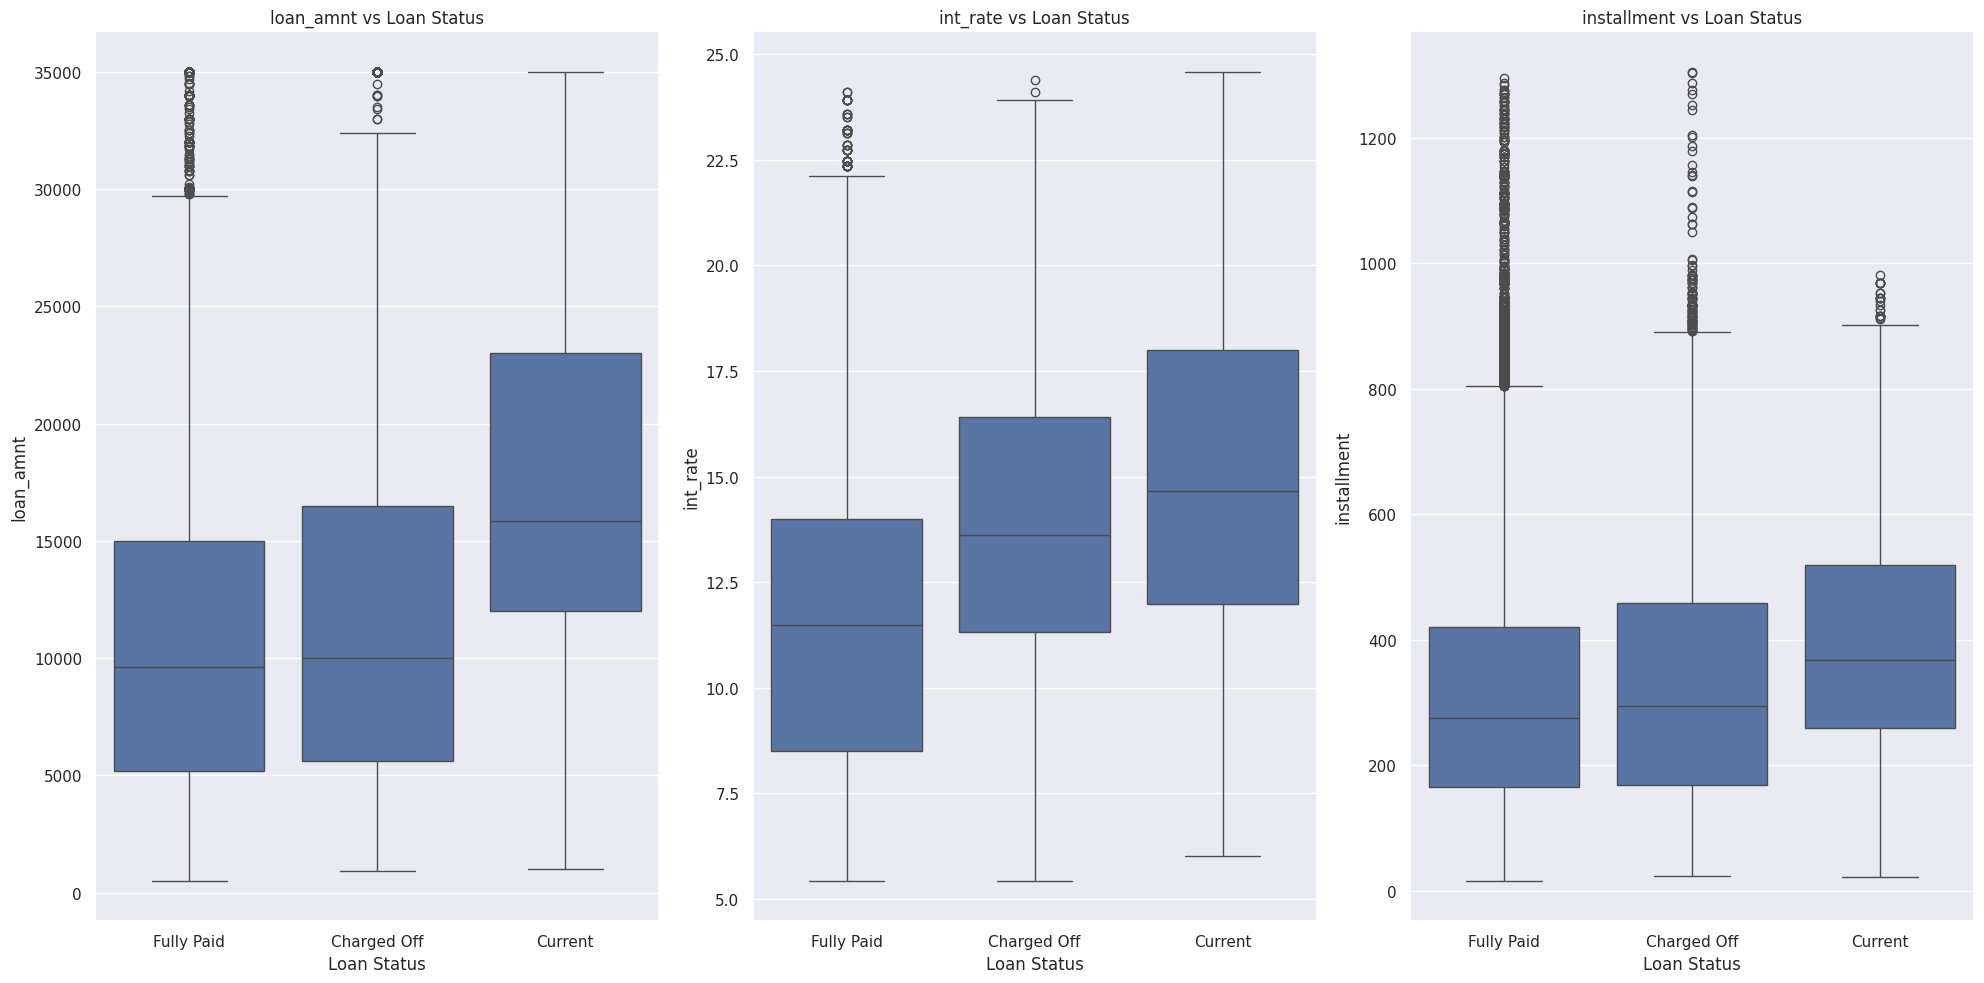

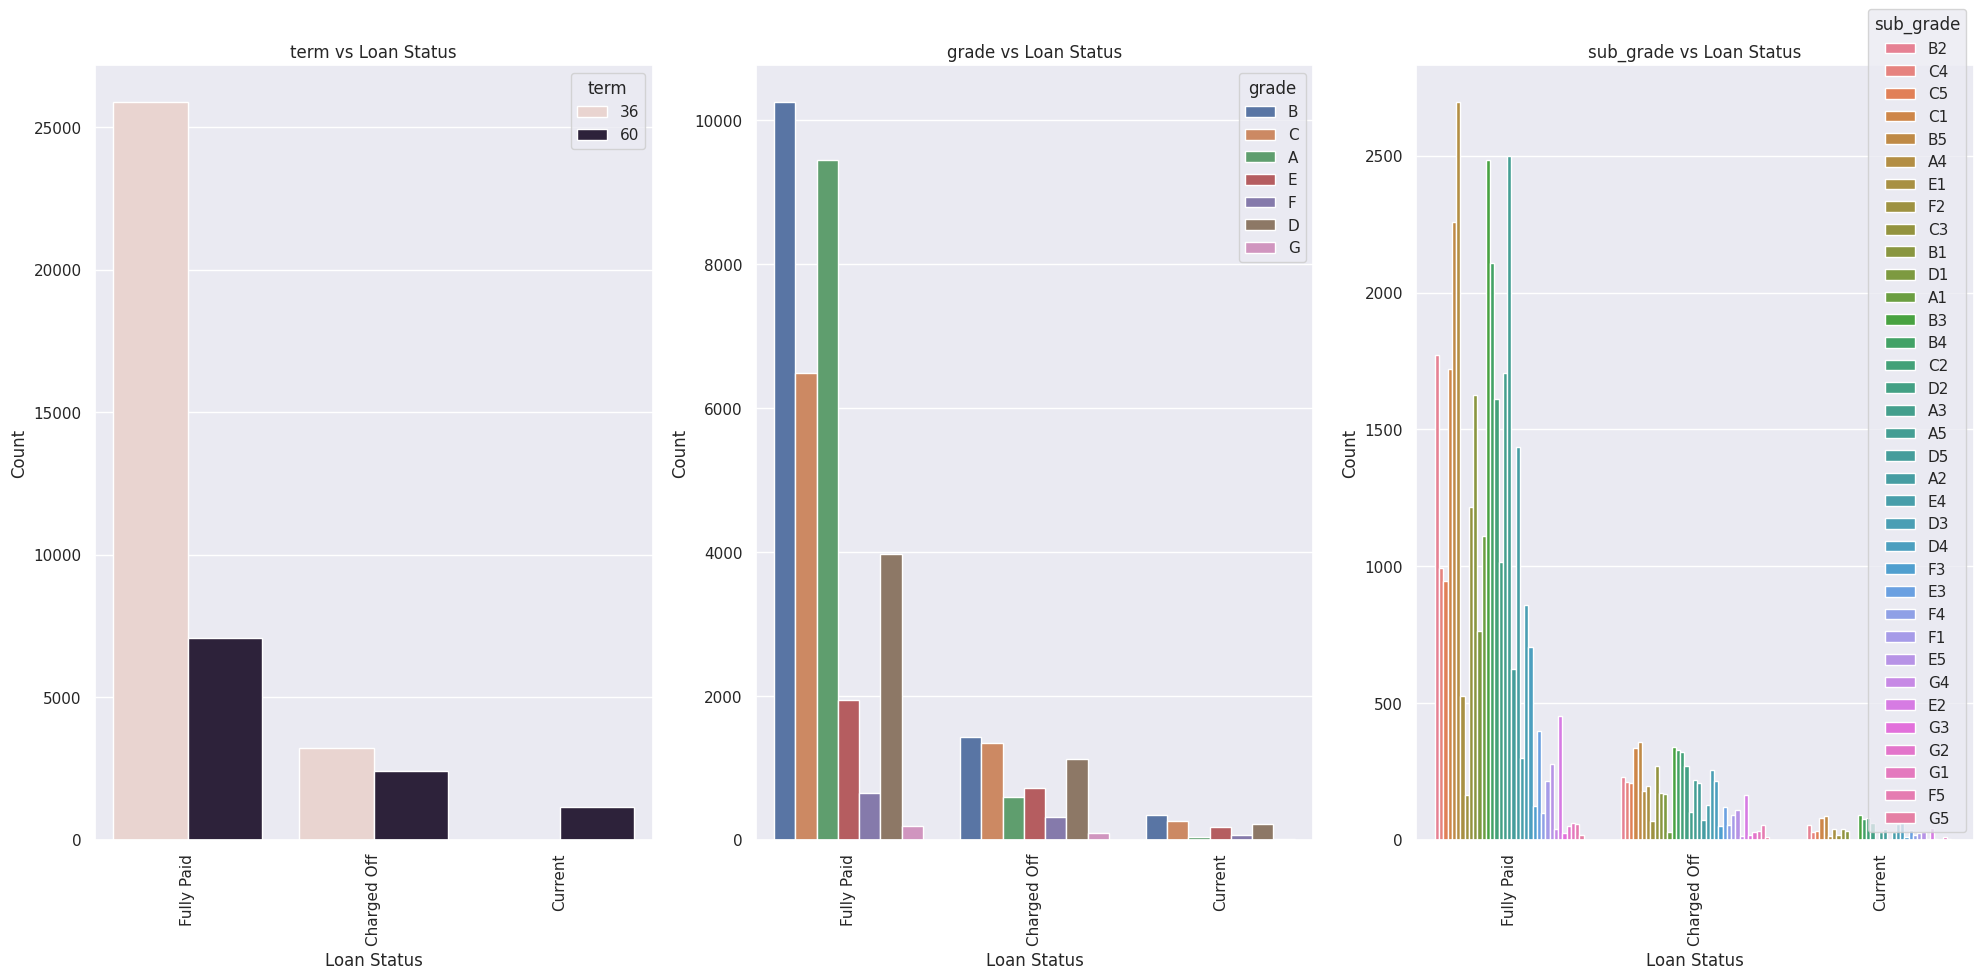

In [41]:
# List of loan characteristic columns for bivariate analysis
loan_characteristics_numerical = ['loan_amnt', 'int_rate', 'installment']
loan_characteristics_categorical = ['term', 'grade', 'sub_grade']

# Numerical loan characteristics vs loan status
plt.figure(figsize=(20, 10))
for i, column in enumerate(loan_characteristics_numerical, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='loan_status', y=column, data=loan_data)
    plt.title(f'{column} vs Loan Status')
    plt.xlabel('Loan Status')
    plt.ylabel(column)
plt.tight_layout()
plt.show()

# Categorical loan characteristics vs loan status
plt.figure(figsize=(20, 10))
for i, column in enumerate(loan_characteristics_categorical, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x='loan_status', hue=column, data=loan_data)
    plt.title(f'{column} vs Loan Status')
    plt.xlabel('Loan Status')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [42]:
print(loan_data[loan_data['loan_status'] == 'Charged Off']['loan_amnt'].sum())
print(loan_data[loan_data['loan_status'] == 'Charged Off']['loan_amnt'].sum()*100/loan_data['loan_amnt'].sum())


68111375
15.285226647552477


#This means that 15.28% of loans get Charged Off amount to 68111375. This is a huge number and is critical.

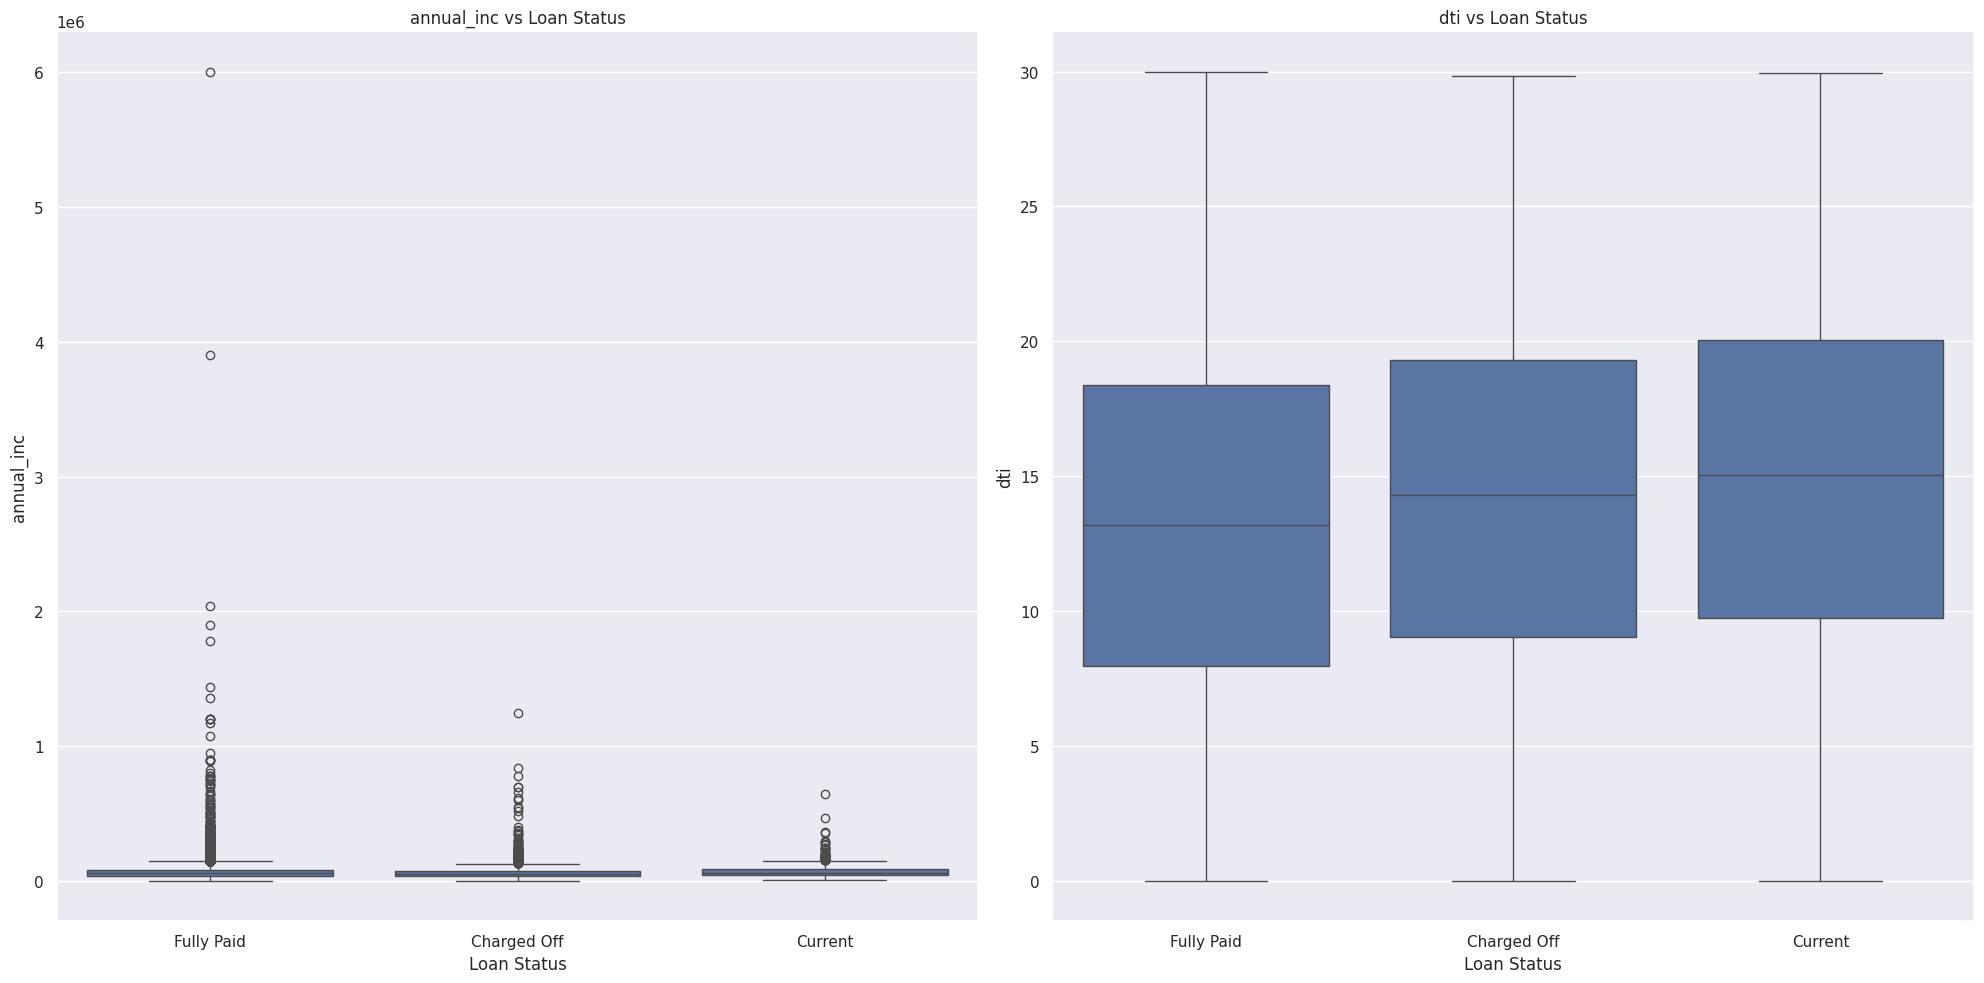

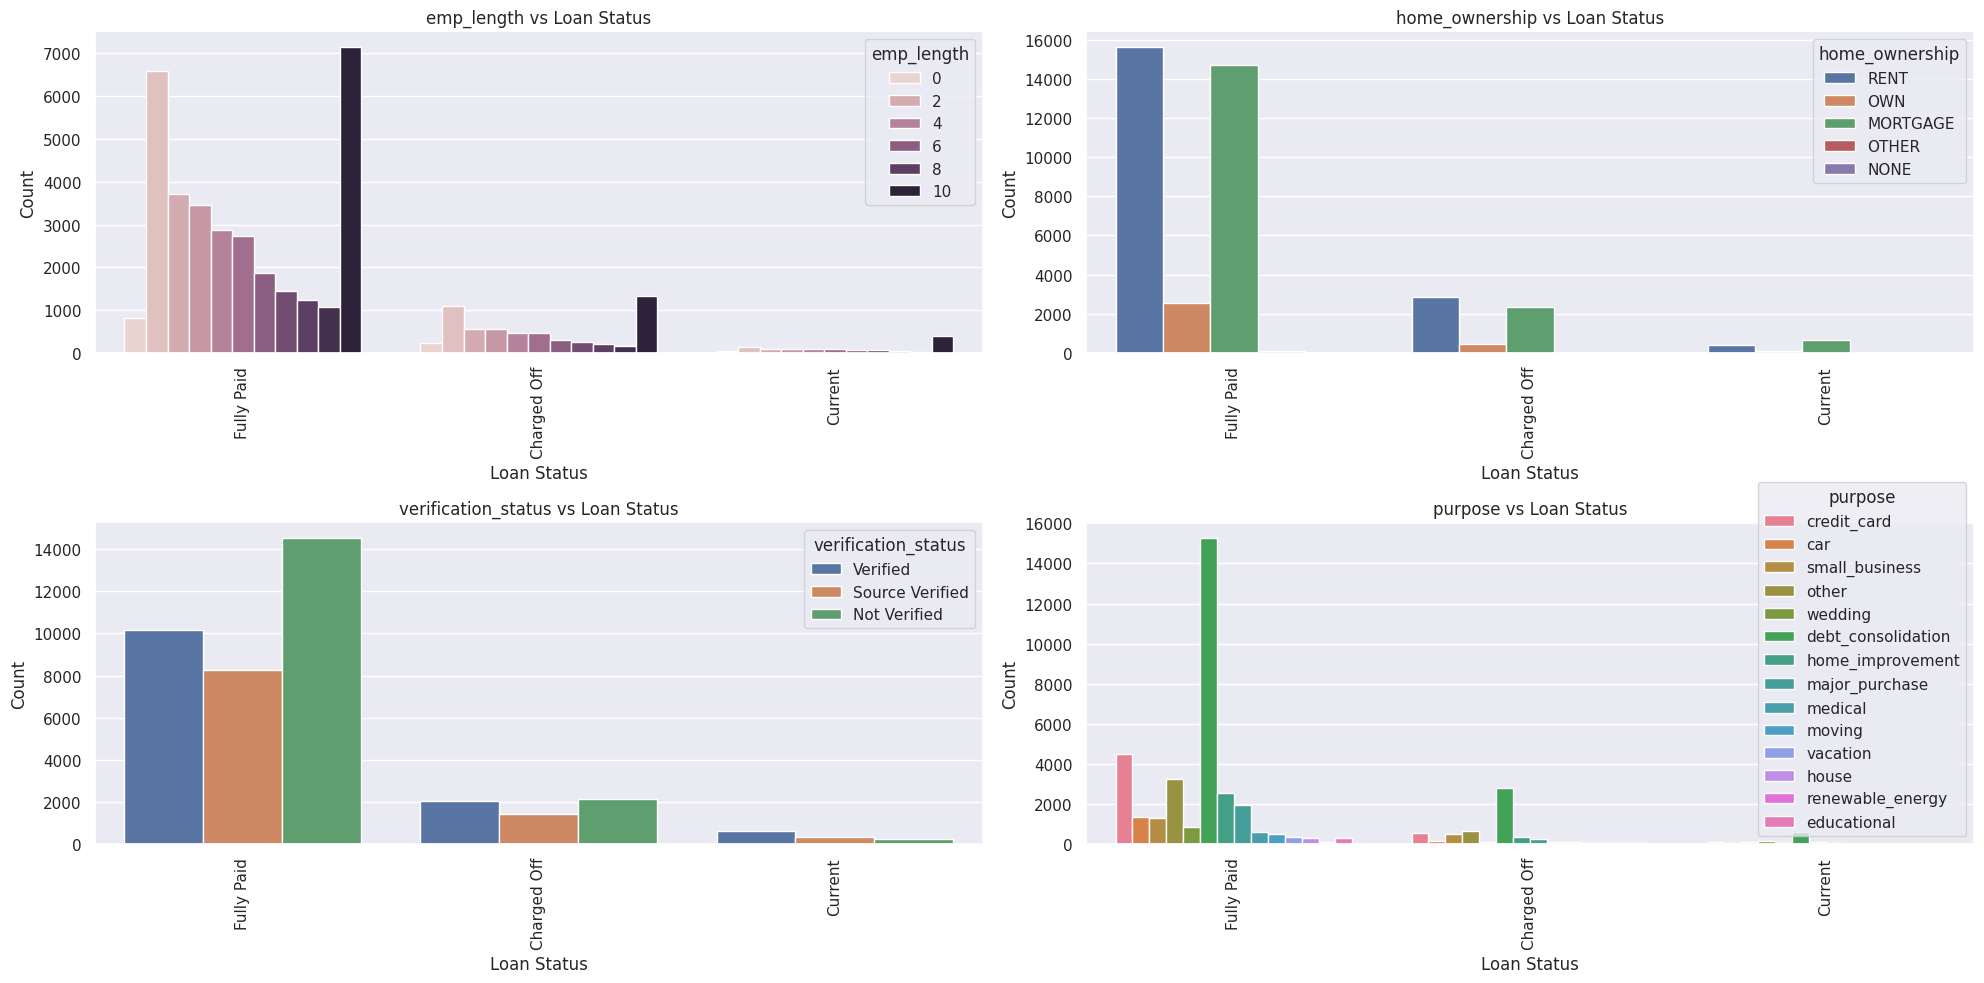

In [43]:
# List of borrower characteristic columns for bivariate analysis
borrower_characteristics_numerical = ['annual_inc', 'dti']
borrower_characteristics_categorical = ['emp_length', 'home_ownership', 'verification_status', 'purpose']

# Numerical borrower characteristics vs loan status
plt.figure(figsize=(20, 10))
for i, column in enumerate(borrower_characteristics_numerical, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x='loan_status', y=column, data=loan_data)
    plt.title(f'{column} vs Loan Status')
    plt.xlabel('Loan Status')
    plt.ylabel(column)
plt.tight_layout()
plt.show()

# Categorical borrower characteristics vs loan status
plt.figure(figsize=(20, 10))
for i, column in enumerate(borrower_characteristics_categorical, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x='loan_status', hue=column, data=loan_data)
    plt.title(f'{column} vs Loan Status')
    plt.xlabel('Loan Status')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

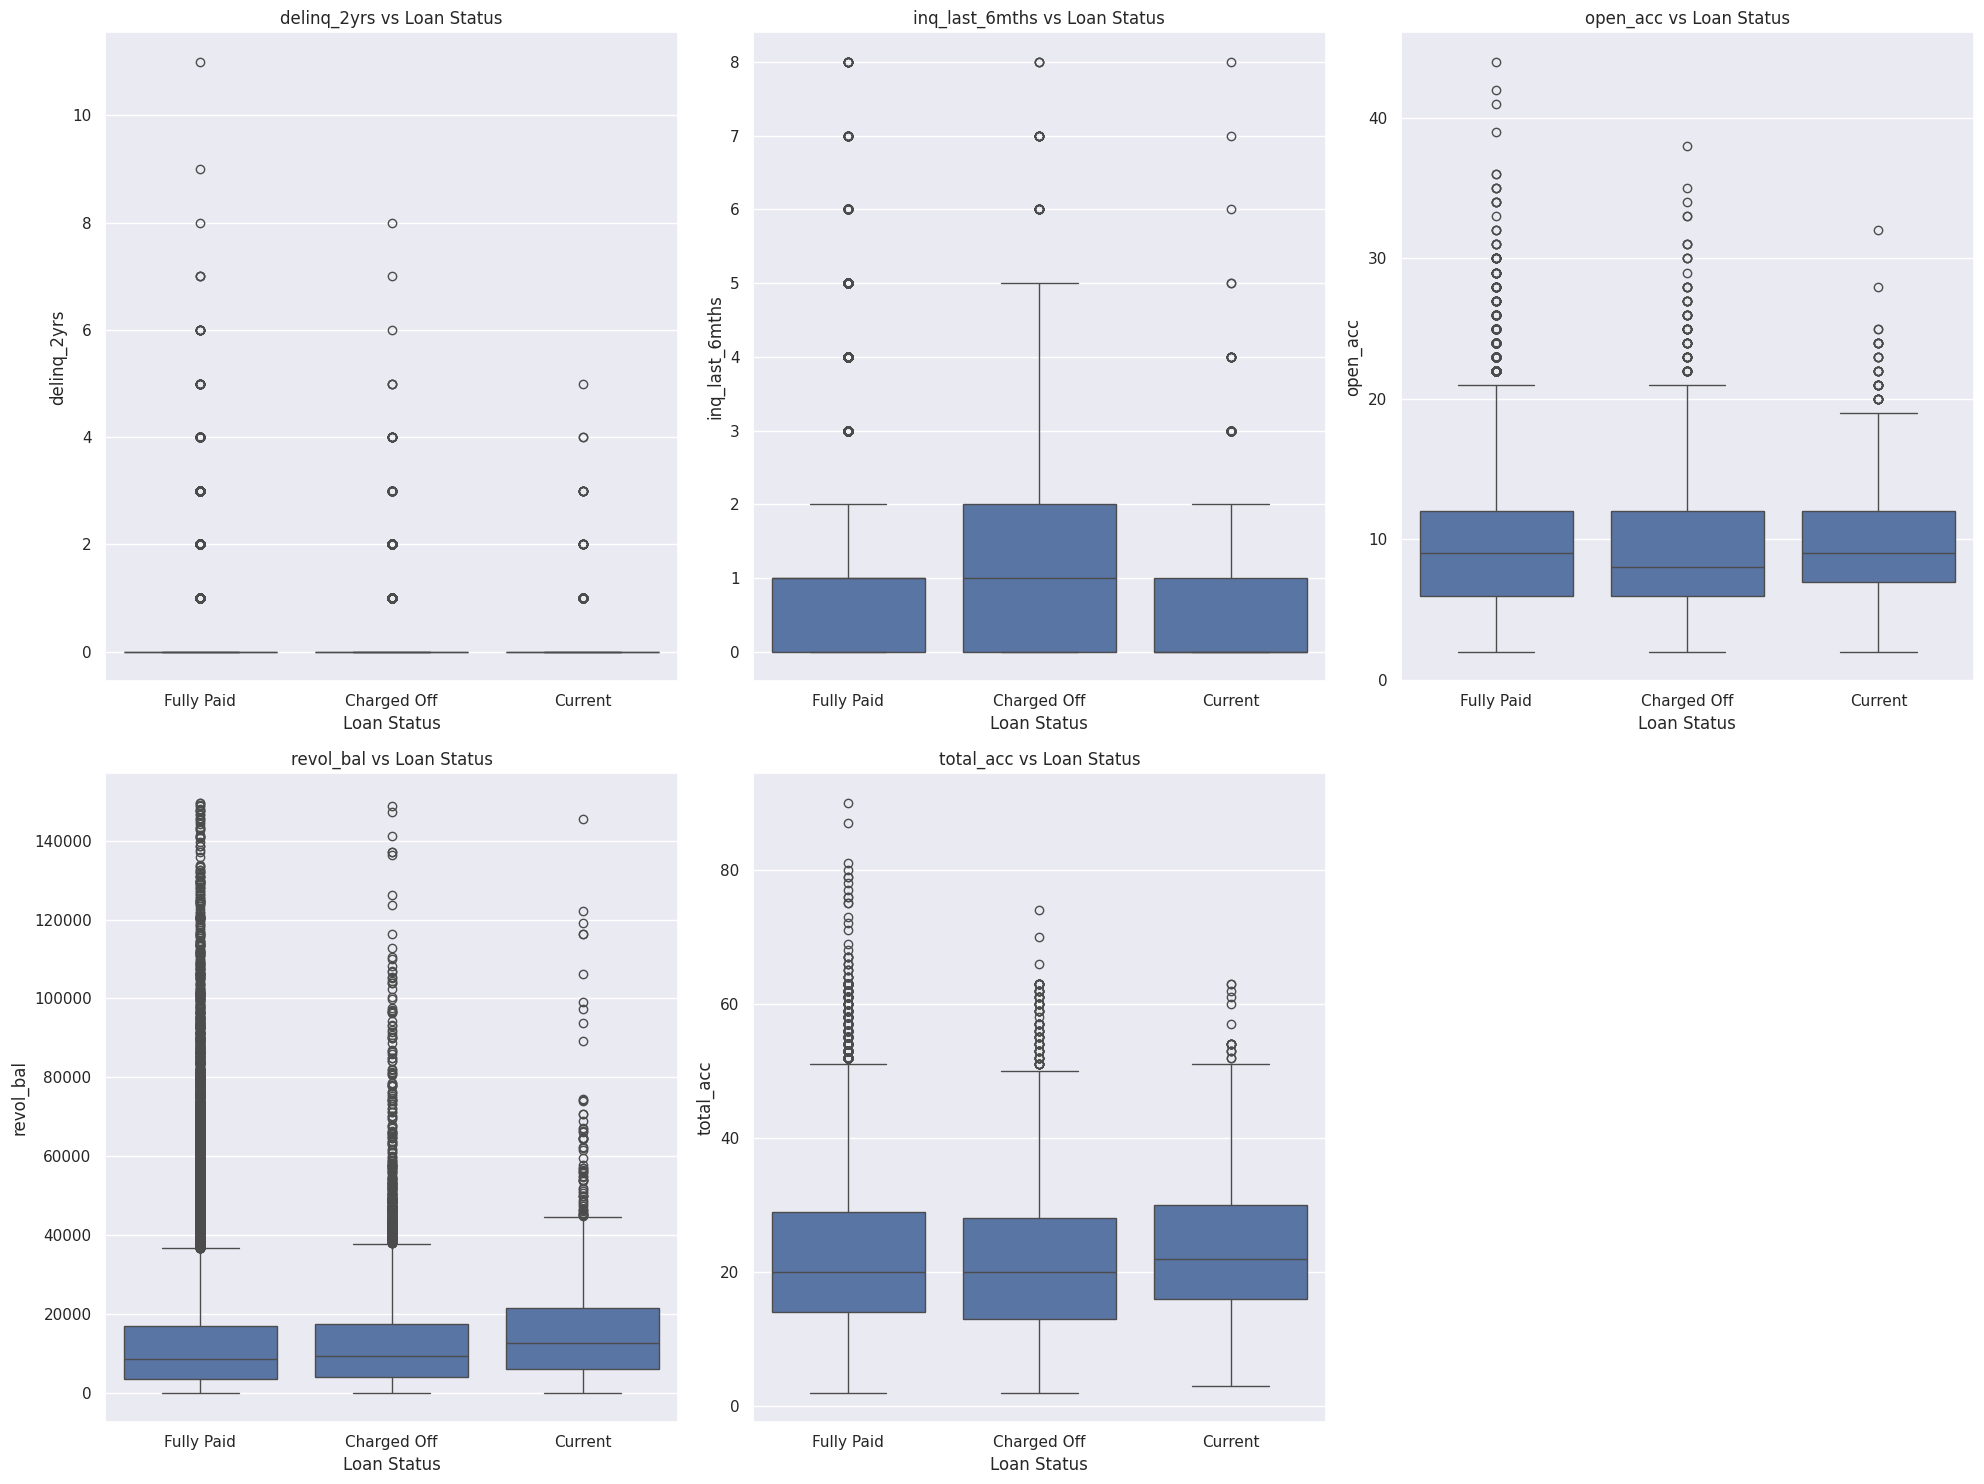

In [44]:
# List of credit history columns
credit_history_columns = ['delinq_2yrs', 'inq_last_6mths', 'open_acc', 'revol_bal', 'total_acc']

# Credit history vs loan status
plt.figure(figsize=(20, 15))
for i, column in enumerate(credit_history_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='loan_status', y=column, data=loan_data)
    plt.title(f'{column} vs Loan Status')
    plt.xlabel('Loan Status')
    plt.ylabel(column)
plt.tight_layout()
plt.show()


In [49]:
loan_data.keys()

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [47]:
#Impact of homeownership and verification status on loan.

grouped = loan_data.groupby(['home_ownership', 'verification_status']).loan_status.agg(
    total_loans='count',  # Count total loans
    charged_off_loans=lambda x: (x == 'Charged Off').sum()  # Count loans with status 'Charged Off'
).reset_index()

# Calculate the percentage of charged off loans
grouped['charged_off_percentage'] = (grouped['charged_off_loans'] / grouped['total_loans']) * 100

# Only show the percentage of charged off loans
result = grouped[['home_ownership', 'verification_status', 'charged_off_percentage']]

# Print the results
print(result)

   home_ownership verification_status  charged_off_percentage
0        MORTGAGE        Not Verified               11.888510
1        MORTGAGE     Source Verified               12.274096
2        MORTGAGE            Verified               15.083547
3            NONE        Not Verified                0.000000
4           OTHER        Not Verified               19.230769
5           OTHER     Source Verified               10.000000
6           OTHER            Verified               19.444444
7             OWN        Not Verified               12.618084
8             OWN     Source Verified               15.194805
9             OWN            Verified               17.245658
10           RENT        Not Verified               13.278257
11           RENT     Source Verified               15.833812
12           RENT            Verified               16.960932
